# FBB you should remove my instruction cells: this should be your notebook, with your description of the exercise as a header, and your code and description of the code, and plots, and explaining why you do what you do. As it is I see you have successfully run some line fits to data, and that you relized that women are payed less, but no further understanding or insight.

# you MUST label, give titles, and decribe with captions ALL OF your figures to show that you are understanding what you are doing, and to allow the reader to understand the notebook without having to read the code (and to allow me to se that you understand the scientific inference). The notebook is a "presentation". This requirement includes using large enough fonts and figures!

# In the conclusions, though you have some good points, you missed the covariance of race and income which invalidates the first part of the analysis (and perhaps the second too)

# look for more comments int he cells containing FBB

## GENDER INCOME GAP

you may know that it is estimated that women earn about 78% of men in the same job position. 
Can we test that on NYC income data? Can we turn that into a prediction: if you get hired at a certain stipend as a men, what should you expect to make as a woman? (or from the point of view of a job employer, perhaps not one with a very strong moral compass, what should I offer to a woman job candidate, given what I would offer a man for the same job?)




In [52]:
from __future__ import print_function, division
import sys, os, numpy as np, pylab as pl, pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


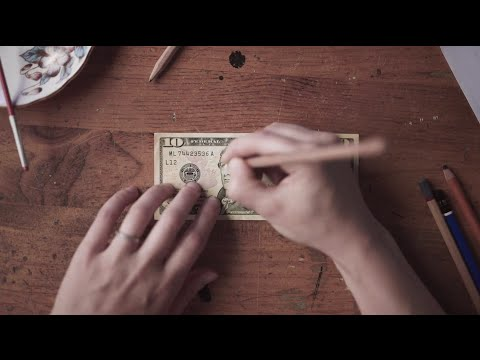

In [53]:
#The gender gap(non mandatory viewing)
from IPython.display import YouTubeVideo
YouTubeVideo("G_ikzQM93W8")

the Census data on income
http://www.census.gov/hhes/www/cpstables/032015/perinc/pinc03_000.htm

I posted the relevant data on the class webpage here : http://cosmo.nyu.edu/~fb55/PUI2016/data

# 1. Create two python dictionaries to store your data. 
```
     allmales = ... 
```
stores the male data
```
    allfemales = ...
```
stores the female data
     
each dictionary needs to have 5 key-pair values with keys:
'all', 'white', 'black', 'hispanic', 'asian'
each value should contain a dataframe read with the pandas read_excel function directly from the url. 

should contain



In [54]:
# to use the url just pass it to pandas read_excell
url = "http://cosmo.nyu.edu/~fb55/PUI2016/data/"

# the file name root is "pinc_" (common to all files)
## 08_2  are male, 
## 08_3 are female, 
### _1_1 is all ethnicities
### _1_4 is white
### _1_6 is black
### _1_8 is asian
### _1_9 is hispanic
# extension is .xls for all files
put together the link name from this info and load the data on your allmales and allfemales dictionaries

use 1 header row (figure out which one by looking at the output of my 
allfemales['all'].head() and .columns a couple of cells below)

In [55]:
allmales = {'all':None, 'white':None, 'black':None, 'hispanic':None, 'asian':None }
allfemales = {'all':None, 'white':None, 'black':None, 'hispanic':None, 'asian':None }
allmales["all"] = pd.read_excel( url + 'pinc08_2_1_1.xls',  header=9)
allmales["white"] = pd.read_excel( url + 'pinc08_2_1_4.xls',  header=9)
allmales["black"] = pd.read_excel( url + 'pinc08_2_1_6.xls',  header=9)
allmales["asian"] = pd.read_excel( url + 'pinc08_2_1_8.xls',  header=9)
allmales["hispanic"] = pd.read_excel( url + 'pinc08_2_1_9.xls',  header=9)
allfemales["all"] = pd.read_excel( url + 'pinc08_3_1_1.xls',  header=9)
allfemales["white"] = pd.read_excel( url + 'pinc08_3_1_4.xls',  header=9)
allfemales["black"] = pd.read_excel( url + 'pinc08_3_1_6.xls',  header=9)
allfemales["asian"] = pd.read_excel( url + 'pinc08_3_1_8.xls',  header=9)
allfemales["hispanic"] = pd.read_excel( url + 'pinc08_3_1_9.xls',  header=9)
type(allfemales)

dict

In [56]:
allfemales['all'].head()

,Characteristic,Total with Income,"$1 to $2,499 or loss","$2,500 to $4,999","$5,000 to $7,499","$7,500 to $9,999","$10,000 to $12,499","$12,500 to $14,999","$15,000 to $17,499","$17,500 to $19,999",...,"$92,500 to $94,999","$95,000 to $97,499","$97,500 to $99,999","$100,000 and over",Median income,Unnamed: 44,Mean income,Unnamed: 46,Gini ratio,Unnamed: 48
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Value\n(Dol.),Standard\nerror (Dol.),Value\n(Dol.),Standard\nerror (Dol.),Ratio,Standard\nerror
1,....Total,109956.0,7590.0,4298.0,5557.0,7874.0,8052.0,5720.0,6768.0,4377.0,...,167.0,285.0,184.0,4442.0,22063,137,31968,250,0.495,0.0025
2,Earnings,74545.0,4198.0,3118.0,3269.0,2662.0,4579.0,1994.0,4134.0,2585.0,...,60.0,236.0,127.0,3535.0,27736,364,36189,307,0.466,0.0032
3,..Wages and Salary,71220.0,3835.0,2954.0,3005.0,2411.0,4309.0,1941.0,3908.0,2484.0,...,61.0,233.0,126.0,3370.0,28402,379,36412,316,0.461,0.0032
4,..Nonfarm Self-Employment,4694.0,1282.0,288.0,410.0,253.0,388.0,84.0,265.0,126.0,...,0.0,0.0,0.0,127.0,10732,399,20942,1123,0.65,0.0162


# Descriptive phase: 


In [66]:
for gender in [allmales, allfemales]:
    for k in gender:
        isreal  = gender[k].applymap(np.isreal)
        for c in gender[k].columns :
            if isreal.sum()[c] > 0 and isreal.sum()[c] < gender[k].shape[0]:
                gender[k][c][~isreal[c]] =  np.nan
                gender[k][c] = gender[k][c].astype(float)

# 2. Exploratory phase
## at this point it is a good idea to see if we can plot some data.
## pandas has a nifty function scatter_matrix which plots every numerical column against the other. 
## however there are a lot of non-real values in these DataFrames so running pd.scatter_matrix(allmales['asian']) for example would fail. You can try!

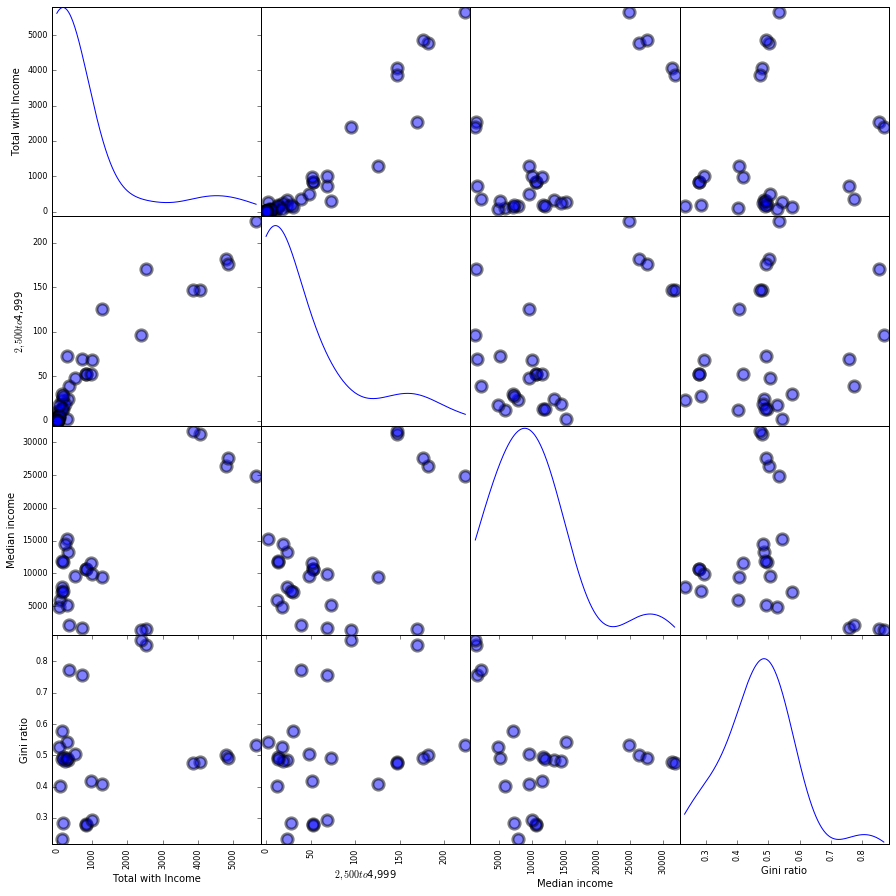

In [67]:
fig = pd.scatter_matrix(allfemales['asian']
                   [[u'Total with Income',u'$2,500 to $4,999',
                     u'Median income',u'Gini ratio']],
                   linewidth= 3, s=500, figsize=(15,15), 
                        diagonal='kde') 

# FBB missing figure caption

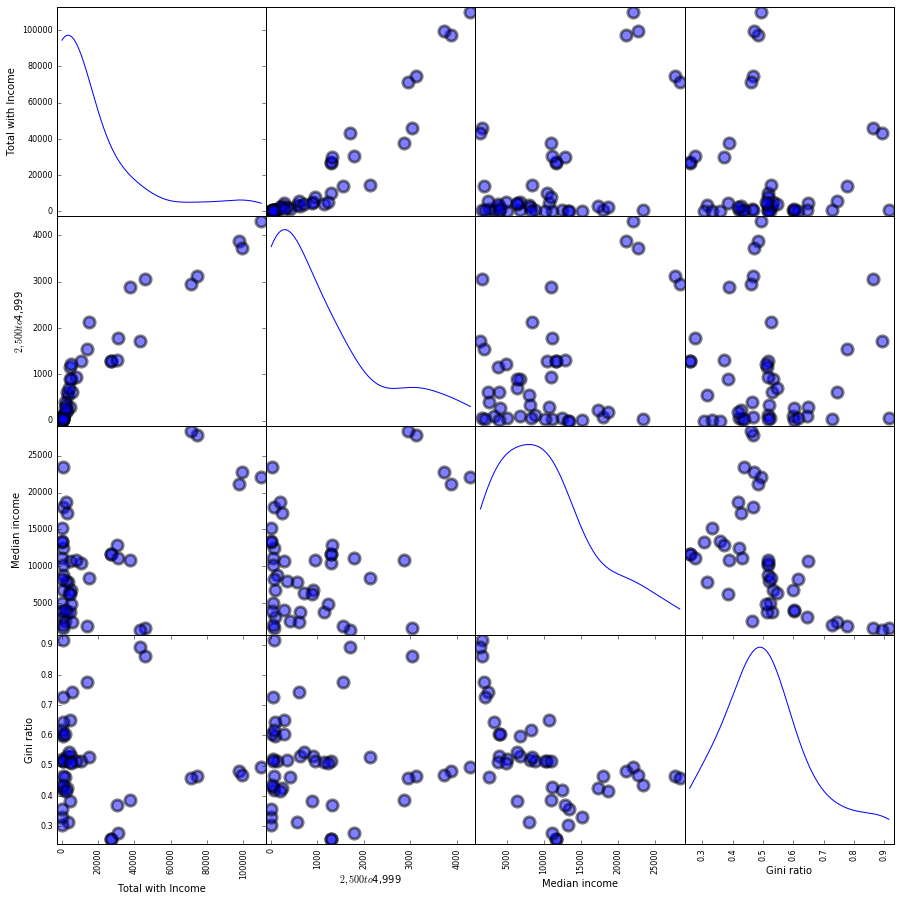

In [59]:
fig = pd.scatter_matrix(allfemales['all']
                   [[u'Total with Income',u'$2,500 to $4,999',
                     u'Median income',u'Gini ratio']],
                   linewidth= 3, s=500, figsize=(15,15), 
                        diagonal='kde') 

# FBB missing figure caption

## 3. to see how the male and female income relate to each other plot the Total Median Income (from any source of revenue) of females vs the Total Median Income of males, race by race (one data point per race)

## also plot the 1-1 line: the diagonal that corresponds to men and women getting the same pay

(make the plot and describe it in a "caption" in the cell below the plot)

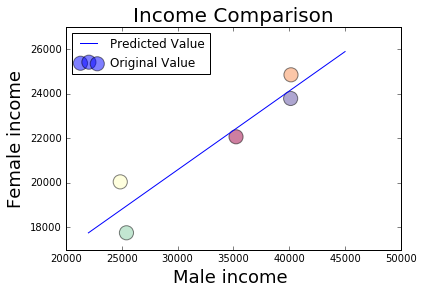

In [70]:
income = pd.DataFrame(columns=['males','females'], index=['all','asian','black','hispanic','white'])
for k in allfemales:
    income["males"][k] = allmales[k]["Median income"][1]
    income["females"][k] = allfemales[k]["Median income"][1]

males = np.array(list(income["males"]))
females = np.array(list(income["females"]))

def linear(a, b, x):
    return a+b*x

params = np.polyfit(males, females, 1)
pl.scatter(males, females, c=range(5), s=200, alpha=0.5,  
           cmap = plt.get_cmap('Spectral'), label='Original Value') 
x=np.arange(22000,45000)
pl.plot(x,linear(params[1],params[0], x), label='Predicted Value')
pl.xlabel("Male income ", fontsize=18)
pl.ylabel("Female income", fontsize=18)
pl.title("Income Comparison", fontsize=20)
pl.legend(loc='best')

# FBB missing figure caption
# this figure is way too small. The legend is not correct, in that the color of the datapoints is not represented. it is not the standard to write a legend for a point in a color different than the plot. 

# If you want to show inequality here use a squared plot and equal axis range, so the 45degree line can easily identified as the equality line and slopes intuitively compared to it.¶


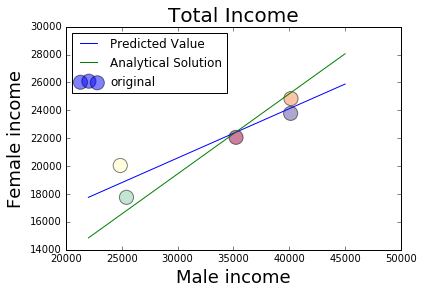

In [71]:
##plotting the Total median incame by race
##pl.scatter...

from scipy import stats
all_males=np.array([0., allmales['all']['Median income'][1],
                    allmales['white']['Median income'][1],
                    allmales['black']['Median income'][1],
                     allmales['hispanic']['Median income'][1],
                    allmales['asian']['Median income'][1]])

all_females=np.array([0.] + [allfemales[k]['Median income'][1] \
                             for k in ['all', 'white', 'black',
                                     'hispanic','asian']])
cor = stats.spearmanr(all_males, all_females)
beta1 = cor[0] * all_females.std() / all_males.std()
beta0 = all_females.mean() - beta1 * all_males.mean()

pl.scatter(males, females, c=range(1,6), s=200, alpha=0.5,  
           cmap = plt.get_cmap('Spectral'), label='original') 
x=np.arange(22000,45000)
pl.plot(x,linear(params[1], params[0], x), label='Predicted Value')
pl.plot(x,linear(beta0, beta1, x), label='Analytical Solution')
pl.xlabel("Male income", fontsize=18)
pl.ylabel("Female income", fontsize=18)
pl.title("Total Income", fontsize=20)
pl.legend(loc='best')

# FBB missing figure caption
# this figure is way too small. The legend is not correct, in that the color of the datapoints is not represented. it is not the standard to write a legend for a point in a color different than the plot. 

# If you want to show inequality here use a squared plot, so the 45degree line can easily identified as the equality line and slopes intuitively compared to it.¶

# without caption figures are pointless

# 5. this was done with THE TOTAL MEDIAN INCOME, let's now see if all forms of income lead to a different fit. 

We only did this for the Total Median Income, but the file contained income from many sources, which were stored in the Characteristics column.
Use one data point for each source of income (each Characteristics) choosing the 'Median income' for that source and fit a line to those data. The line fit should similar then the previous fit if the Total median income was representative for all forms of income included in this analysis.

To unravel the data and concatenate them back together in a single array is a little complex; 
here are a few lines of code that should do the trick ( this is just what I came up with. If you have something better please share!!)

I used np.concatenate to put together arrays (it takes a list of arrays) and np.flatten to make the array 1 dimensional after merging. I also want to maske the nan values (many functions do not deal well with them). I do that "broadcasting":  using an array of Bools indeces to select the non nan values. Where the array of Bools is True the value is selected, where it is False it is not: e.g.

In [134]: a = np.arange(5)

In [135]: abol = a>2

In [136]: abol
Out[136]: array([False, False, False,  True,  True], dtype=bool)

In [137]: a[abol]
Out[137]: array([3, 4])

In [72]:
all_males_allincomes = np.array(
    np.concatenate([allmales['all']['Median income'][:].values,
                    allmales['white']['Median income'][:].values,
                    allmales['black']['Median income'][:].values,
                    allmales['hispanic']['Median income'][:].values,
                    allmales['asian']['Median income'][:].values]).flatten())
#with a list comprehension syntax, but the result i the same as above
all_females_allincomes = np.array(
    np.concatenate([allfemales[k]['Median income'][:].values \
                    for k in ['all',
                                   'white', 'black', 
                                    'hispanic', 'asian']]).flatten())

#IDepending on what you use to fit you may need to remove NaN values 
#I am gonna create the mask in the next line. 
#the mask is False where either male or female value is NaN. 
#Notice that True is really just >1, and False really 0. 
#so i can add the male and female mask and the resulting mask will be 
#False where both arrays are not Nan, and true otherwise. 

mask = ~(np.isnan(all_males_allincomes) + np.isnan(all_females_allincomes))
# now you can use mask as an index (broadcasting) to select the non NaN values

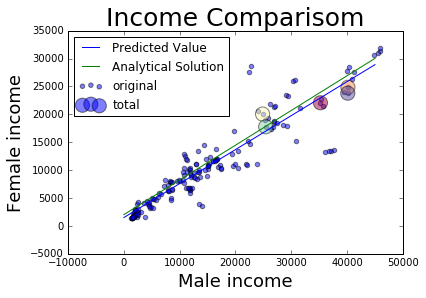

In [75]:
params_all = np.polyfit(all_males_allincomes[mask],all_females_allincomes[mask],1)
cor = stats.spearmanr(all_males_allincomes[mask], all_females_allincomes[mask])
beta1_all = cor[0] * all_females_allincomes[mask].std() / all_males_allincomes[mask].std()
beta0_all = all_females_allincomes[mask].mean() - beta1 * all_males_allincomes[mask].mean()
pl.scatter(all_males_allincomes[mask], all_females_allincomes[mask], s=20, alpha=0.5,  
           cmap = plt.get_cmap('Spectral'), label='original') 
pl.scatter(males, females, c=range(1,6), s=200, alpha=0.5,  
           cmap = plt.get_cmap('Spectral'), label="total") 
x=np.arange(0,45000)
pl.plot(x,linear(params_all[1],params_all[0],x), label='Predicted Value')
pl.plot(x,linear(beta0_all,beta1_all,x), label='Analytical Solution')
pl.xlabel("Male income", fontsize=18)
pl.ylabel("Female income", fontsize=18)
pl.title("Income Comparisom", fontsize=25)
pl.legend(loc='best')

# this figure is way too small, and eveb more crowded than the other ones
# The legend is not correct, in that the color of the datapoints is not represented. it is not the standard to write a legend for a point in a color different than the plot. 

# If you want to show inequality here use a squared plot, so the 45degree line can easily identified as the equality line and slopes intuitively compared to it.¶


### The analytical solution line is above the predicted value, meaning that female gets paid less than they should. 

# FBB This inference is not justified. You have not shown what women *should earn*. You the data just may show that they are payed less than man. Also you are not relating this statement to the plot. Why does the line show that? the slope is less than the x=y line (which you were supposed to plot but did not)

# FBB There is no discussion of your results at all

# 6. PREDICTION


## Now pick a stipend (maybe your ideal stipend).
## and predict what a woman in a position where a man recieves your ideal stipend would make



In [83]:
# FBB dont let your lines be longer than the cells!
male_income = 40000
female_income = linear(params_all[1], params_all[0], male_income) 
female_income_analytical = linear(beta0_all, beta1_all, male_income)
# print("If a male worker gets paid for ${}, female worker in the same position is predicted to be paid ${}, wheareas the analytical solution suggests that she is be paid for ${}.".format(male_income, female_income, female_income_analytical))
print("If a male worker gets paid for ${}, female worker in the same position is predicted to be paid ${}, " + 
      "wheareas the analytical solution suggests that she is be paid for ${}.".format(male_income, 
                                                                                      female_income, 
                                                                                      female_income_analytical))

If a male worker gets paid for $40000, female worker in the same position is predicted to be paid $25853.8603858, wheareas the analytical solution suggests that she is be paid for $26911.365245.


### Either way, females are underpaid. 

# FBB this is not a scientific statement. It may be correct, and the data may help you make a case for it. But all that the data shows is that they are payed less

# 7. lastly do you have any comments about what these data tell us about race? 
how you would go about analyzing race differences with these data? (just a few sentences)

In [89]:
from scipy.stats import ttest_rel
ttest_rel(income['males'], income['females'])

Ttest_relResult(statistic=5.1151166212269574, pvalue=0.0069095367731370544)

### Some might suggest that the difference in income is only due to chance, or the lack of accuracy in data, however, using a paired t-test comparing the median income by race, on a significance level of 0.05, we can reject the null hypothesis that people in the same race gets paid the same

# FBB  that is true, but ethnicity is covariant with income, which  invalidate the first part of the analysis and may invalidate the second the analysis (see my solution)
